In [69]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [2]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [5]:
# ANÁLISIS EXPLORATORIO DE DATOS
# Mostrar las primeras filas del dataset
wine_data.head()
# TODO: Muestra la información general del dataset (tipos de datos, valores no nulos)
wine_data.info()
# TODO: Calcula y muestra las estadísticas descriptivas del dataset
wine_data.describe().round(2)
# TODO: Verifica si hay valores nulos en el dataset
wine_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

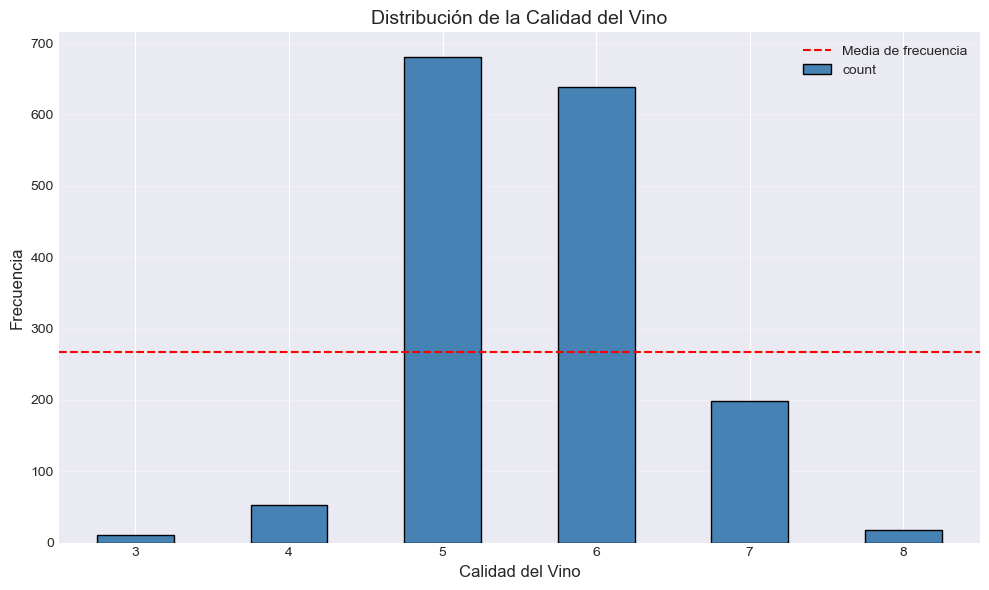

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [4]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

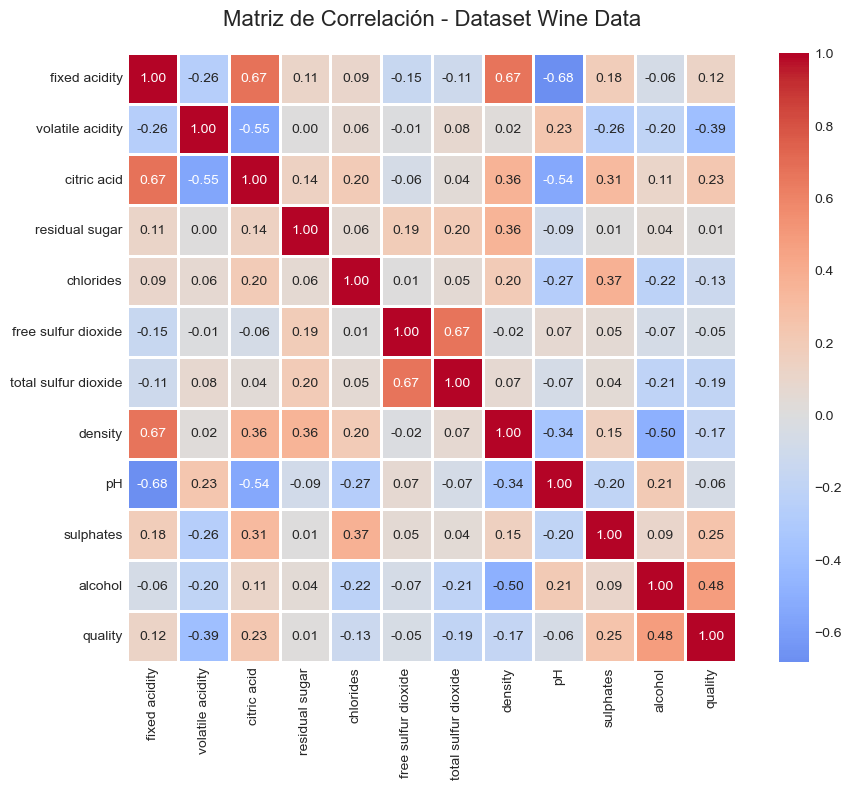

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64


<Figure size 1400x1000 with 0 Axes>

In [8]:
# TODO: Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
correlation_matrix = wine_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación - Dataset Wine Data', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
# Completa el código para crear el heatmap
# TODO: Identifica y muestra las 5 variables más correlacionadas con 'quality'
corr_quality = correlation_matrix["quality"]
quality_related = corr_quality.abs().sort_values(ascending=False).head(6)
print(quality_related)

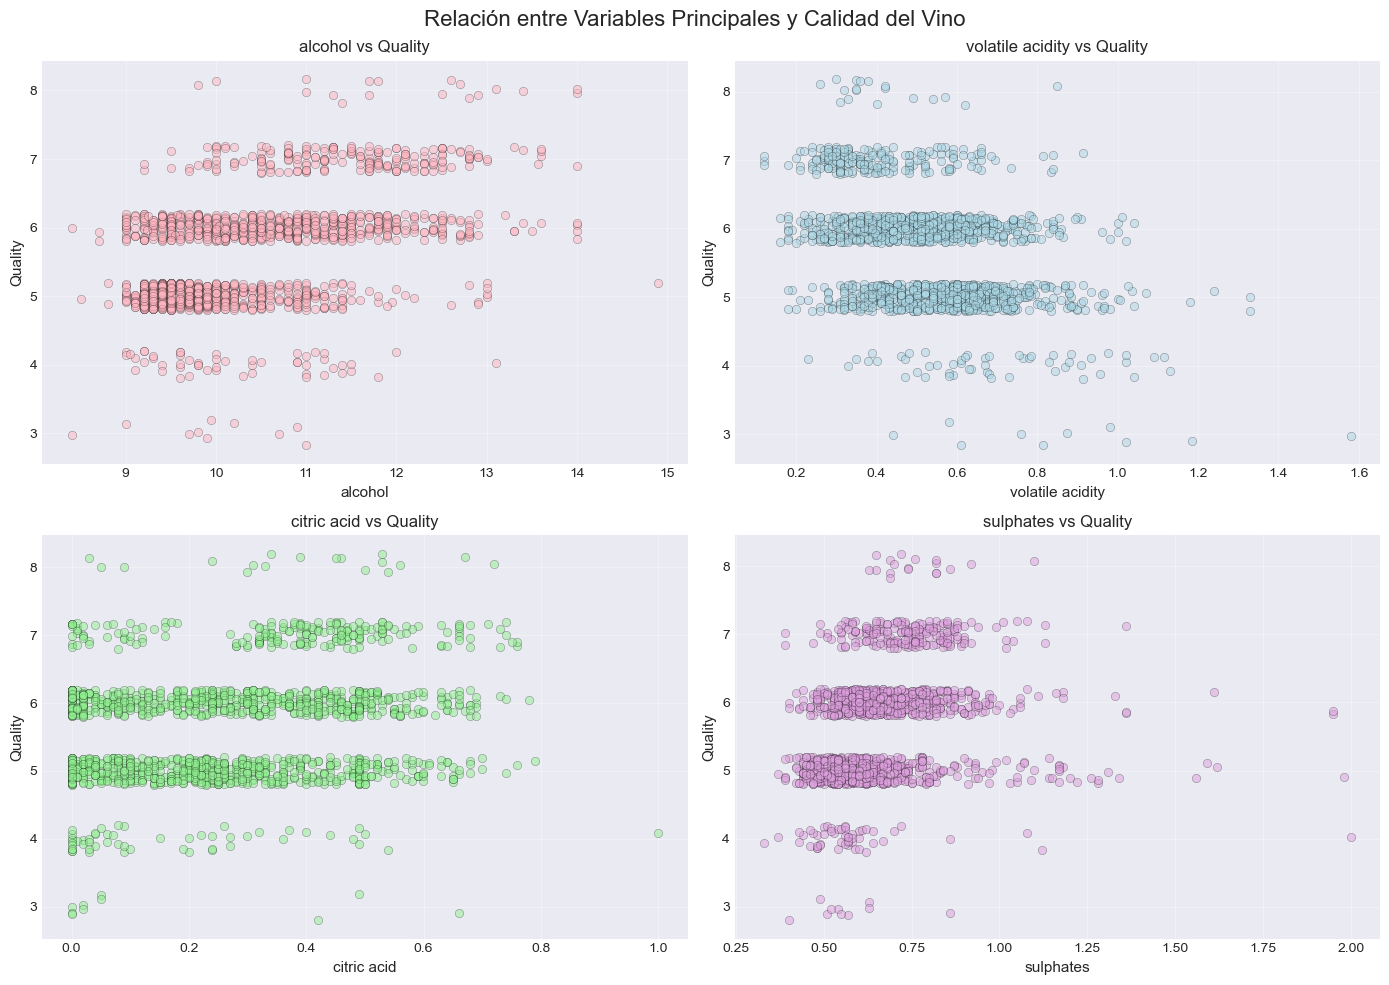

In [22]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

colors = ['lightpink', 'lightblue', 'lightgreen', 'plum']

for ax, feature, color in zip(axes.flat, top_features, colors):
    jittered_quality = wine_data['quality'] + np.random.uniform(-0.2, 0.2, size=len(wine_data))
    
    ax.scatter(wine_data[feature], jittered_quality, 
               alpha=0.5, color=color, edgecolors='black', linewidth=0.3)
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Quality', fontsize=11)
    ax.set_title(f'{feature} vs Quality', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
#3. Preparación de Datos
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

# TODO: Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# TODO: Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Tamaño del conjunto de entrenamiento: 1279 muestras (80.0%)
Tamaño del conjunto de prueba: 320 muestras (20.0%)
Media de X_train_scaled: [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.]
Desviación estándar de X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
#4 Validación cruzada
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# TODO: Identifica el mejor alpha basado en el RMSE medio más bajo
best_result = min(cv_results_manual, key = lambda x: x['mean_rmse'])
best_alpha = best_result['alpha']
print(f"Mejor alpha: {best_alpha}")

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)
Mejor alpha: 100


In [30]:
# TODO: Usa RidgeCV para encontrar automáticamente el mejor alpha
# Pista: RidgeCV tiene un parámetro 'alphas' y 'cv'
alphas = np.logspace(-3, 3, 100) 

# RidgeCV con validación cruzada de 5 folds
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)  # X_train_scaled debe estar estandarizado

# Mejor alpha encontrado
print(f"Mejor alpha encontrado por RidgeCV: {ridge_cv.alpha_}")



Mejor alpha encontrado por RidgeCV: 81.11308307896873


Mejor alpha: 54.555947811685144
Mejor score (RMSE): 0.6624


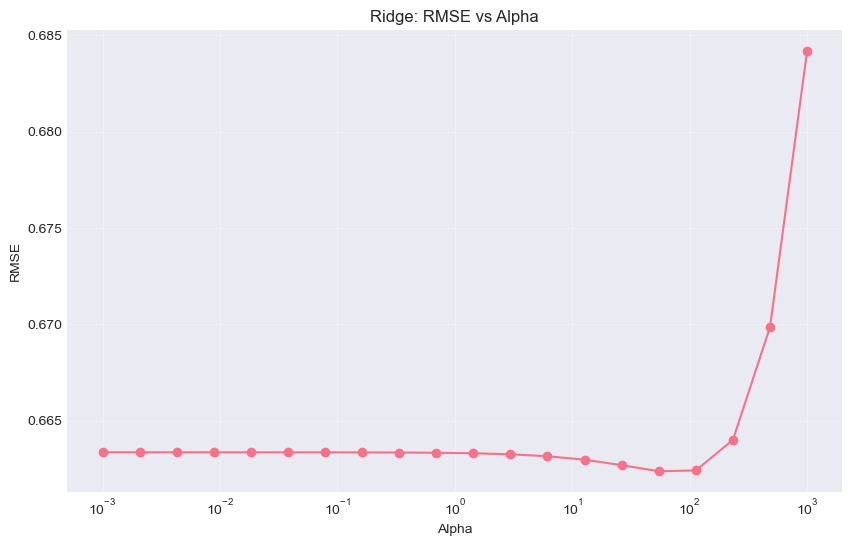

In [33]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# TODO: Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'
grid_search_ridge = GridSearchCV(estimator = ridge_base, param_grid = param_grid_ridge, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search_ridge.fit(X_train_scaled, y_train)

best_rmse = np.sqrt(-grid_search_ridge.best_score_)
print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Mejor score (RMSE): {best_rmse:.4f}")

# TODO: Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha
results = grid_search_ridge.cv_results_
alphas = results['param_alpha'].data.astype(float)
mean_rmse = np.sqrt(-results['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mean_rmse, marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge: RMSE vs Alpha')
plt.grid(True, alpha=0.3)
plt.show()


In [35]:
#Modelos de Regresión
#5.1 Regresión Lineal Normal
# TODO: Implementa y entrena un modelo de regresión lineal
# Tu código aquí

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Calcular métricas
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

print("Regresión Lineal:")
print(f"RMSE Train: {rmse_lr_train:f}")
print(f"RMSE Test: {rmse_lr_test:f}")
print(f"R² Train: {r2_lr_train:f}")
print(f"R² Test: {r2_lr_test:f}")

Regresión Lineal:
RMSE Train: 0.651300
RMSE Test: 0.624520
R² Train: 0.347993
R² Test: 0.403180


In [39]:
# TODO: Entrena Ridge con el mejor alpha encontrado por validación cruzada

best_alpha_ridge = ridge_cv.alpha_ # Usa el mejor alpha de la sección anterior
ridge_model = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Predicciones y métricas
y_pred_ridge_train = ridge_model.predict(X_train_scaled)
y_pred_ridge_test = ridge_model.predict(X_test_scaled)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

print("Resultados Ridge:")
print(f"RMSE Train: {rmse_ridge_train:f}")
print(f"RMSE Test: {rmse_ridge_test:f}")
print(f"R² Train: {r2_ridge_train:f}")
print(f"R² Test: {r2_ridge_test:f}")

#----------------------------------------------------------------------------------------------------------------------
#5.3 Lasso Regression con validación cruzada
# TODO: Implementa LassoCV para encontrar el mejor alpha automáticamente

alphas_lasso = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42, max_iter=5000)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.alpha_

# Predicciones y métricas
y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test = lasso_cv.predict(X_test_scaled)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print(f"--------------------")
print(f"Resultados Lasso:")
print(f"RMSE Train: {rmse_lasso_train:f}")
print(f"RMSE Test: {rmse_lasso_test:f}")
print(f"R² Train: {r2_lasso_train:f}")
print(f"R² Test: {r2_lasso_test:f}")
print(f"Mejor alpha Lasso: {best_alpha_lasso:f}")


Resultados Ridge:
RMSE Train: 0.651868
RMSE Test: 0.626152
R² Train: 0.346853
R² Test: 0.400058
--------------------
Resultados Lasso:
RMSE Train: 0.652170
RMSE Test: 0.626642
R² Train: 0.346250
R² Test: 0.399117
Mejor alpha Lasso: 0.008498


In [ ]:
# TODO: Identifica qué características fueron eliminadas por Lasso
for feature, coef in zip(X_train.columns, lasso_cv.coef_):
    print(f"{feature}: {coef:f}")

eliminated = X_train.columns[lasso_cv.coef_ == 0]
print("Variables eliminadas por Lasso:")
print(eliminated.tolist())

fixed acidity: 0.009743
volatile acidity: -0.171165
citric acid: -0.000000
residual sugar: 0.000000
chlorides: -0.080162
free sulfur dioxide: 0.035793
total sulfur dioxide: -0.100195
density: -0.000000
pH: -0.051761
sulphates: 0.133200
alcohol: 0.298733
Variables eliminadas por Lasso:
['citric acid', 'residual sugar', 'density']


Comparación de Modelos:
   Modelo  RMSE Train  RMSE Test  R² Train   R² Test  MAE Test
0  Lineal    0.651300   0.624520  0.347993  0.403180  0.503530
1   Ridge    0.651868   0.626152  0.346853  0.400058  0.506280
2   Lasso    0.652170   0.626642  0.346250  0.399117  0.507139


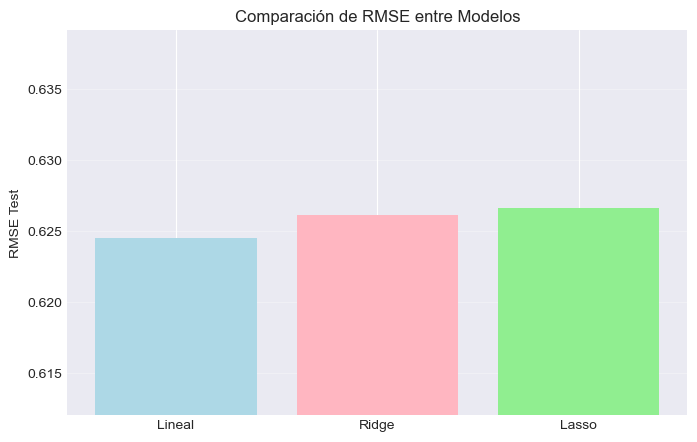

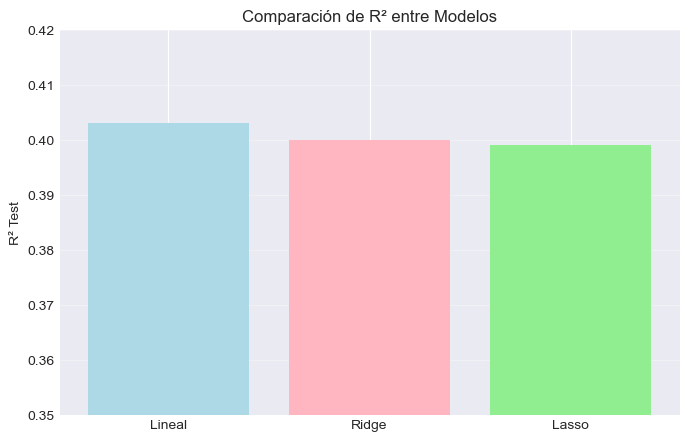

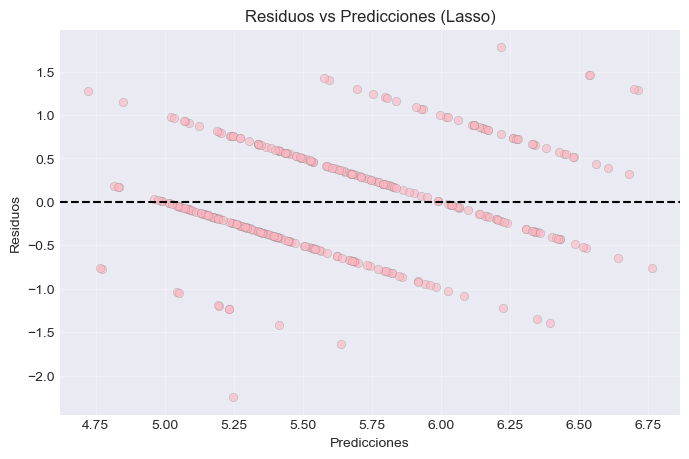

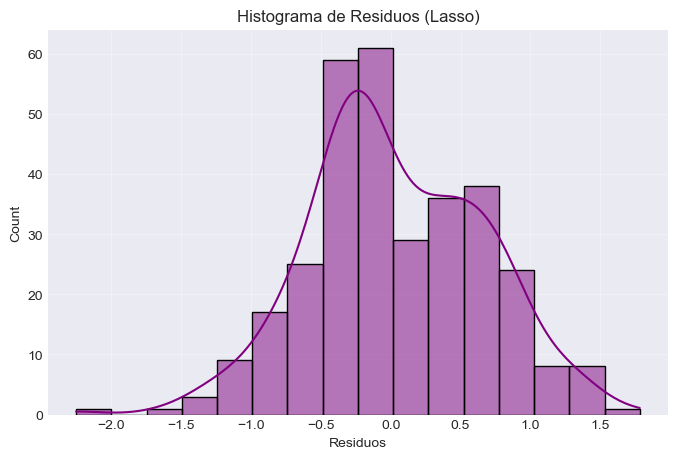

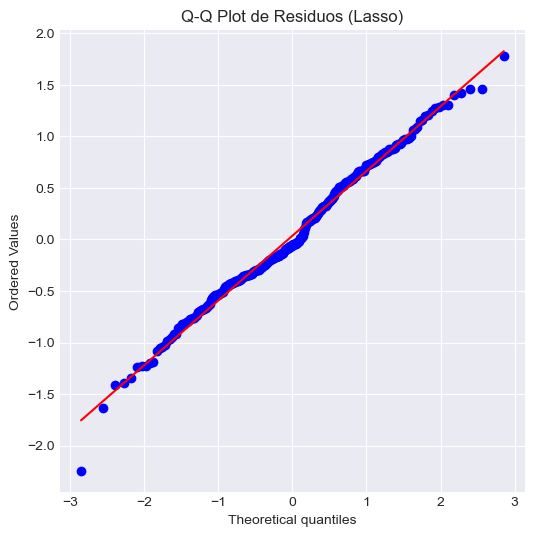

In [ ]:
#6. Comparación de Modelos
# TODO: Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test
comparison_data = {
    'Modelo': ['Lineal', 'Ridge', 'Lasso'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_ridge_test, rmse_lasso_test],
    'R² Train': [r2_lr_train, r2_ridge_train, r2_lasso_train],
    'R² Test': [r2_lr_test, r2_ridge_test, r2_lasso_test],
    'MAE Test': [
        mean_absolute_error(y_test, y_pred_lr_test),
        mean_absolute_error(y_test, y_pred_ridge_test),
        mean_absolute_error(y_test, y_pred_lasso_test)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Comparación de Modelos:")
print(comparison_df)

# TODO: Crea visualizaciones para comparar los modelos
# 1. Gráfico de barras comparando RMSE
plt.figure(figsize=(8,5))
plt.bar(comparison_df['Modelo'], comparison_df['RMSE Test'], color = ['lightblue','lightpink','lightgreen'])
plt.ylabel('RMSE Test')
plt.title('Comparación de RMSE entre Modelos')
plt.grid(axis='y', alpha=0.3)
min = comparison_df['RMSE Test'].min() * 0.98 
max = comparison_df['RMSE Test'].max() * 1.02  
plt.ylim(min, max)
# 2. Gráfico de barras comparando R²
plt.figure(figsize=(8,5))
plt.bar(comparison_df['Modelo'], comparison_df['R² Test'], color=['lightblue','lightpink','lightgreen'])
plt.ylabel('R² Test')
plt.title('Comparación de R² entre Modelos')
plt.grid(axis='y', alpha=0.3)

# Ajustar escala del eje Y
plt.ylim(0.35, 0.42)  # funciona correctamente ahora
plt.show()

#7. Análisis de Residuos
# TODO: Para el mejor modelo, crea:
# 1. Gráfico de residuos vs predicciones
residuals = y_test - y_pred_lasso_test
plt.figure(figsize=(8,5))
plt.scatter(y_pred_lasso_test, residuals, alpha=0.6, color='lightpink', edgecolors='grey', linewidth=0.3)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones (Lasso)')
plt.grid(True, alpha=0.3)
plt.show()
# 2. Histograma de residuos
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuos')
plt.title('Histograma de Residuos (Lasso)')
plt.grid(True, alpha=0.3)
plt.show()
# 3. Q-Q plot de residuos
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos (Lasso)')
plt.show()

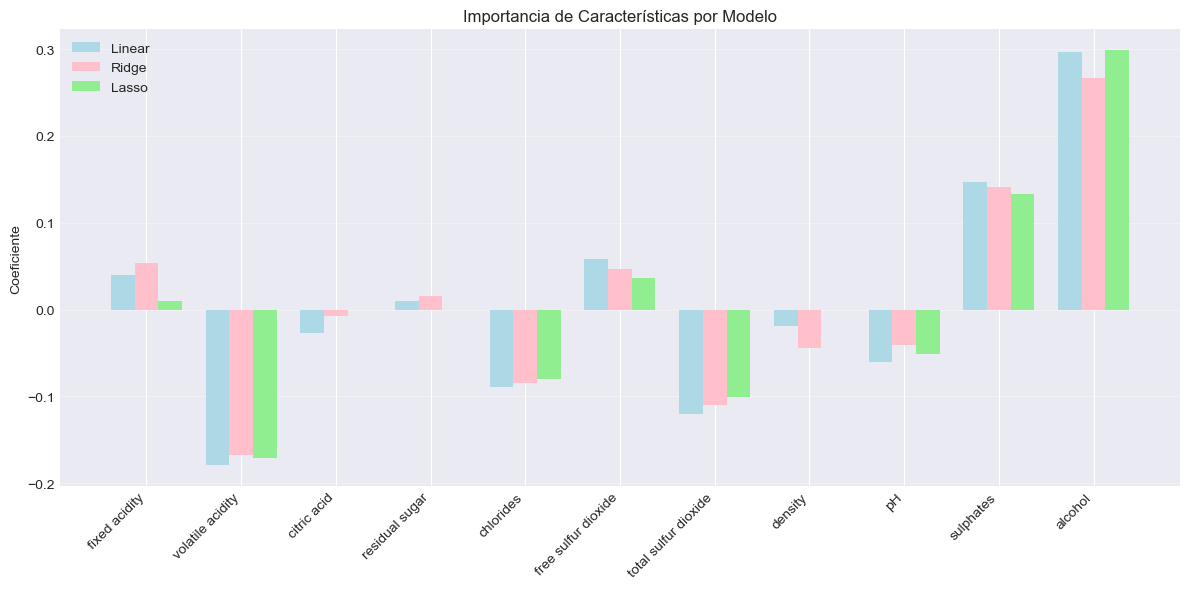

In [ ]:
#8. Importancia de Características
# TODO: Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes
features = X_train.columns
c_lr = lr_model.coef_
c_ridge = ridge_model.coef_
c_lasso = lasso_cv.coef_

coef_df = pd.DataFrame({
    'Feature': features,
    'Linear': c_lr,
    'Ridge': c_ridge,
    'Lasso': c_lasso
})

# Gráfico de barras (coeficientes lado a lado)
x = np.arange(len(features))
width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - width, coef_df['Linear'], width=width, color='lightblue', label='Linear')
plt.bar(x, coef_df['Ridge'], width=width, color='pink', label='Ridge')
plt.bar(x + width, coef_df['Lasso'], width=width, color='lightgreen', label='Lasso')

plt.xticks(x, features, rotation=45, ha='right')
plt.ylabel('Coeficiente')
plt.title('Importancia de Características por Modelo')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [71]:
#9. Validación Cruzada Final del Mejor Modelo
# TODO: Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE
cv_scores = cross_val_score(lasso_cv, X_train_scaled, y_train, cv=10, scoring='neg_root_mean_squared_error')

cv_scores = -cv_scores

print("Validación Cruzada Final (10 folds) - Lasso")
print(f"RMSE medio: {cv_scores.mean():f}")
print(f"Desviación estándar del RMSE: {cv_scores.std():f}")           

Validación Cruzada Final (10 folds) - Lasso
RMSE medio: 0.657249
Desviación estándar del RMSE: 0.059243


**¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?**  
Mi respuesta:  
El mejor modelo fue **Lasso**, porque pudo eliminar variables irrelevantes, enfocándose en características importantes y evitando complicar el modelo. Por ello el RMSE en prueba fue más bajo y el R² más consistente.

---

**¿Qué características son las más importantes para predecir la calidad del vino?**  
Mi respuesta:  
**Alcohol, volatile acidity, citric acid y sulphates**. Principalmente el alcohol, que casi siempre tiene el coeficiente más alto en todos los modelos. Lasso por su parte, eliminó algunas otras que no influían tanto.

---

**¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?**  
Mi respuesta:  
Sí, un poco en **regresión lineal**, porque el RMSE en entrenamiento era más bajo que en prueba mientras que la R² en entrenamiento era mayor que en test. Tal vez no generaliza bien, pero aprendió los datos.

---

**¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?**  
Mi respuesta:  
Cuando **alpha era muy pequeño**, ambos modelos se parecían más a la regresión lineal normal y podían sobreajustar. Al aumentar alpha, Ridge y Lasso reducen los coeficientes, controlando la complejidad. En Lasso, al aumentar demasiado alpha, algunas variables importantes también se acercaban a cero y el RMSE subía.

---

**¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?**  
Mi respuesta:  
Pude tener una **medida más confiable del RMSE** porque no dependía de una sola división. También para elegir el mejor alpha sin sobreajustar.

---

**Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?**  
Mi respuesta:  
**Sí**, porque eliminó variables irrelevantes que solo añadían ruido. Lo que hizo al modelo más simple y estable.

---

**¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?**  
Mi respuesta:  
Tal vez **transformar** algunas variables para que tengan una distribución más normal.
